#### Usage to plot similarity matrix

In [1]:
#for relative open masslib
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.mass import Tmds
from nhsmasslib.mass import MassSpectrumList

#### Load spectra

In [3]:
masses = []
names = []
for filename in sorted(os.listdir("data/similarity/")):
    if filename[-3:] != 'csv':
        continue
    names.append(filename[:-4])
    masses.append(MassSpectrum().load(f"data/similarity/{filename}"))

#### Create MassSpectrumList instance

In [4]:
collection = MassSpectrumList(masses, names)

#### Calc and Plot similarity matrix

In [5]:
collection.calculate_similarity()


array([[1.        , 0.54059885, 0.51145857, 0.41632192, 0.37029826,
        0.49619659],
       [0.54059885, 1.        , 0.61365083, 0.24328619, 0.13520855,
        0.24184197],
       [0.51145857, 0.61365083, 1.        , 0.22988136, 0.11110317,
        0.19984796],
       [0.41632192, 0.24328619, 0.22988136, 1.        , 0.52025792,
        0.4364328 ],
       [0.37029826, 0.13520855, 0.11110317, 0.52025792, 1.        ,
        0.49085349],
       [0.49619659, 0.24184197, 0.19984796, 0.4364328 , 0.49085349,
        1.        ]])

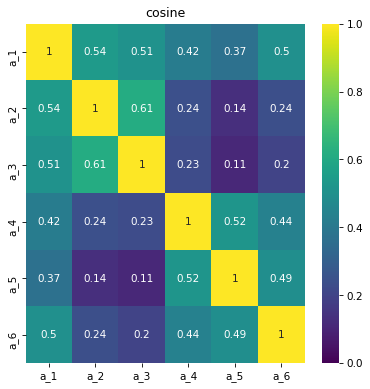

In [6]:
collection.draw_similarity()

#### Batch processing


100%|██████████| 91/91 [00:02<00:00, 39.79it/s]


         a_1       a_2       a_3       a_4       a_5       a_6
1   0.000000  0.011896  0.030115  0.001462  0.000349  0.000358
2   0.008299  0.049071  0.129063  0.004610  0.000349  0.009667
3   0.030429  0.102602  0.138145  0.003149  0.000699  0.020408
4   0.013370  0.049814  0.060229  0.003261  0.002794  0.020766
5   0.008299  0.033457  0.009560  0.002699  0.004890  0.021482
6   0.154910  0.223048  0.209847  0.036995  0.012574  0.029717
7   0.257261  0.317472  0.260994  0.105814  0.090814  0.132832
8   0.161826  0.094424  0.068356  0.126054  0.128886  0.226638
9   0.050715  0.017844  0.007648  0.037783  0.050646  0.121375
10  0.005071  0.006691  0.000000  0.005285  0.010828  0.027927
11  0.095897  0.060967  0.061185  0.074665  0.107579  0.027211
12  0.093130  0.030483  0.022467  0.252446  0.293049  0.111350
13  0.075150  0.000743  0.001434  0.216687  0.196298  0.137845
14  0.017520  0.000000  0.000000  0.041156  0.028292  0.053348
15  0.004610  0.000000  0.000000  0.002137  0.000699  0

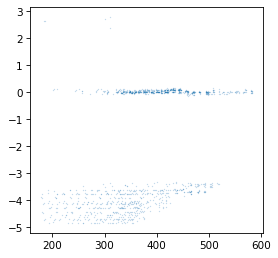

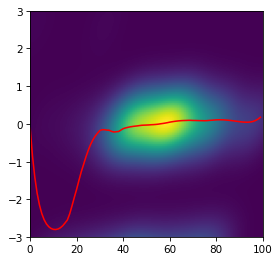

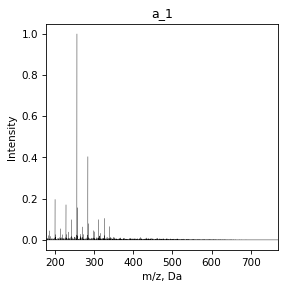

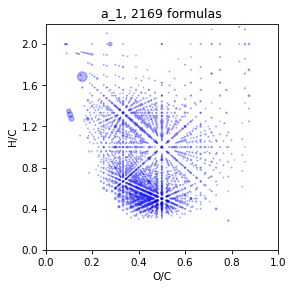

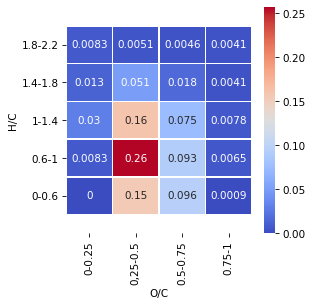

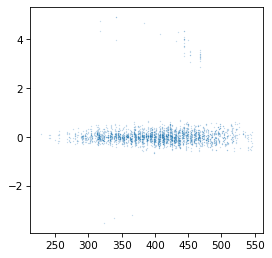

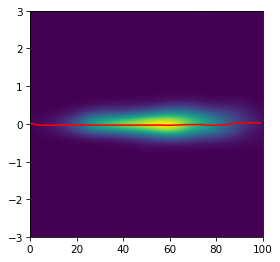

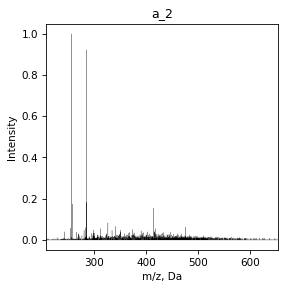

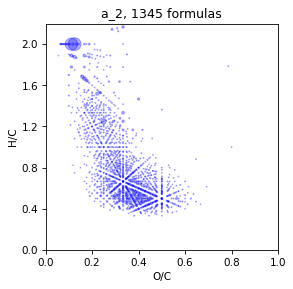

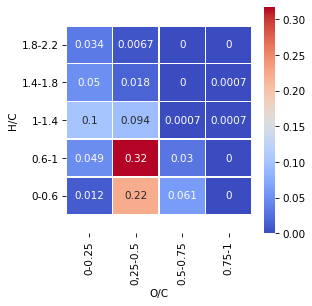

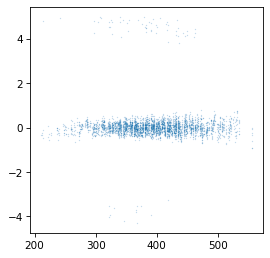

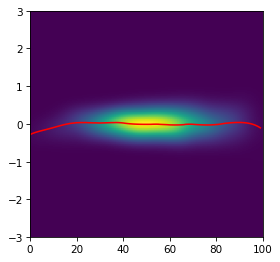

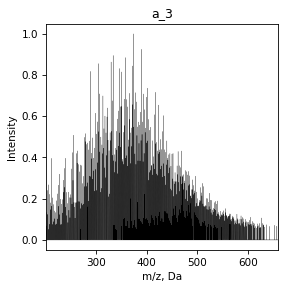

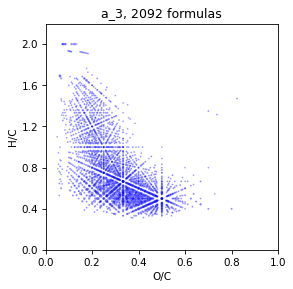

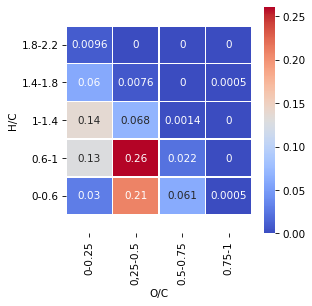

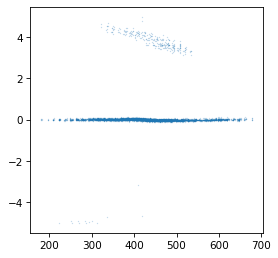

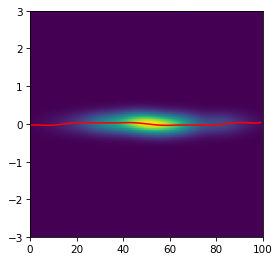

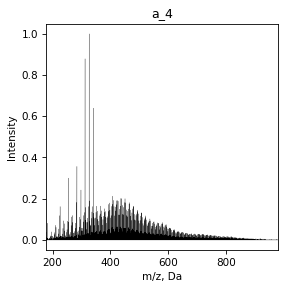

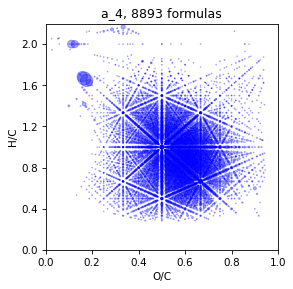

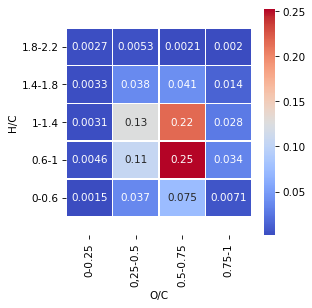

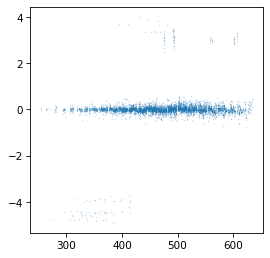

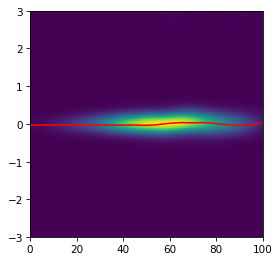

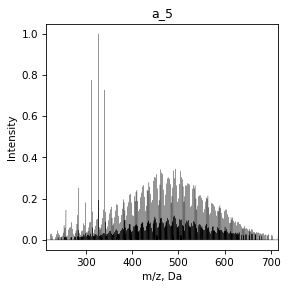

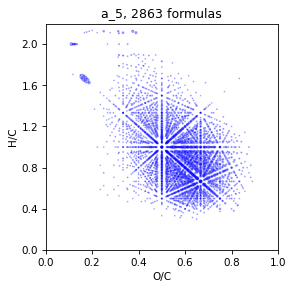

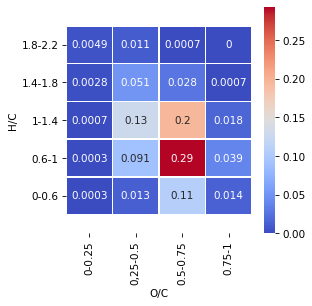

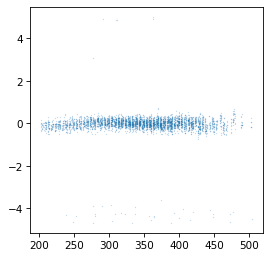

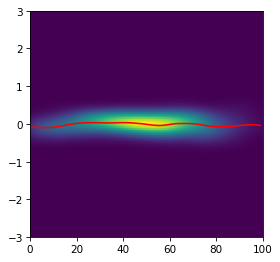

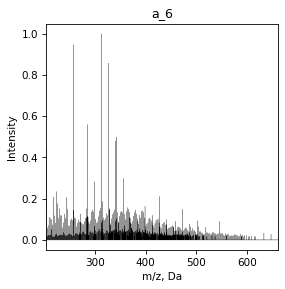

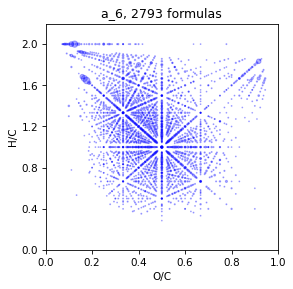

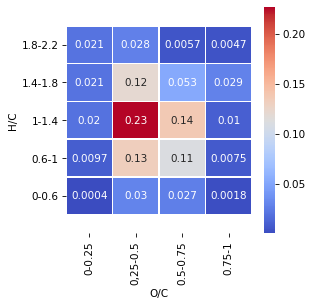

In [7]:
squares = pd.DataFrame()

for i, spec in enumerate(collection.spectra):

    spec = spec.recallibrate(how='mdm')
    spec = spec.assign(sign=None)
    try:
        spec = spec.assign_by_tmds(max_num=100)
    except:
        pass

    spec.draw()
    plt.title(collection.names[i])
    
    collection.spectra[i] = spec

    vk = VanKrevelen(spec)
    vk.draw_scatter()
    plt.title(f'{collection.names[i]}, {len(spec.drop_unassigned())} formulas')

    square = vk.squares()
    squares[collection.names[i]] = square['value']

squares.index = [i for i in range(1,21)]
print(squares)

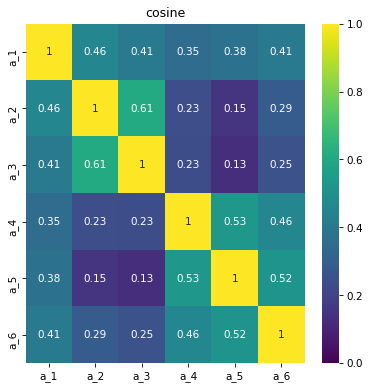

In [8]:
collection.draw_similarity()

#### We can also calculate TMDS-spectrum and look simmmilarity of its

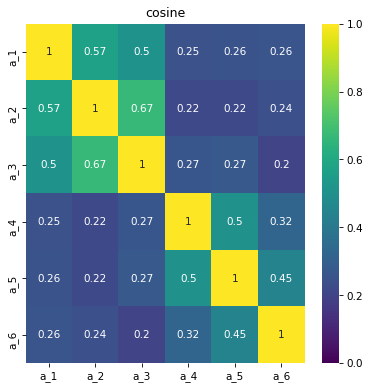

In [9]:
tmd = MassSpectrumList([], collection.names)

for i, spec in enumerate(collection.spectra):
    tmds = Tmds().calc(spec, p=0.2, C13_filter = True) #by varifiy p-value we can choose how much mass-diff we will take
    tmds = tmds.assign(gdf={'C':(-1,20),'H':(-4,40), 'O':(-1,20),'N':(0,1)})
    tmds = tmds.calculate_mass()
    tmd.spectra.append(tmds)

tmd.draw_similarity()  